# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

Today, the volume, velocity, and variety of digital content are growing exponentially across the globe. This has led to information overload, making it difficult for listeners to discover new music that truly resonates with them. With millions of songs available on streaming platforms, users often face choice paralysis. Music recommendation systems have become essential tools in helping listeners find songs and artists that match their tastes, keeping them engaged and enhancing their overall experience.

Streaming platforms like Spotify, Apple Music, YouTube Music, and Pandora use sophisticated recommendation models to provide personalized playlists and song suggestions. These companies invest heavily in developing AI-driven algorithms that enhance user satisfaction by delivering tailored music recommendations.

Spotify, for example, is renowned for its highly accurate and dynamic recommendation system. It intelligently analyzes a listener’s past behaviors, preferences, and listening patterns to curate personalized playlists such as Discover Weekly and Release Radar. One of Spotify’s core recommendation models is collaborative filtering, which compares users with similar listening habits to suggest music they might enjoy. Additionally, deep learning and audio analysis techniques help identify similarities between songs, ensuring a highly personalized and engaging music discovery experience.

### **The objective:**

As a data scientist looking to build a music recommendation system using the Taste Profile Subset from Echo Nest and the Million Song Dataset. My goal is to develop a system that can recommend songs to users based on their past listening behavior and preferences.

The dataset contains labeled listening history, providing valuable insights into user preferences and song characteristics. By analyzing this data, I aim to extract meaningful patterns and build an intelligent recommendation model that enhances music discovery and personalized listening experiences.

This project will involve exploring various recommendation techniques such as collaborative filtering, content-based filtering, and clustering-based recommendation to optimize music recommendations. By leveraging the rich metadata and user interaction data in the Taste Profile Subset, I aim to create an effective and scalable recommendation system for music enthusiasts.

### **The key questions:**

During this project I will attempt to answer the following key questions:

- What are the key features of a song that influence user preference?
- What type of recommendation algorithm should be used?
- How do we avoid popularity bias, where only mainstream songs get recommended?

### **The problem formulation**:

In the context of music recommendation systems, we are using data science to solve the problem of music discovery and personalization. With millions of songs available on streaming platforms, users often struggle to find music that aligns with their tastes. A data-driven recommendation system can help by analyzing user behavior and song attributes to provide personalized music recommendations.

- How do we provide recommendations that feel personalized and engaging?
- How do we diversify recommendations so users don’t just hear the same popular tracks?
- What models can scale to millions of users while maintaining accuracy?

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

First I will mount Google Drive on Colab.

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all the necessary libraries.

In [2]:
import warnings # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np # Basic library of python for numeric and dataframe computations
import pandas as pd # Basic library of python for numeric and dataframe computations

import matplotlib.pyplot as plt # Basic library for data visualization
import seaborn as sns # Slightly advanced library for data visualization

from collections import defaultdict # A dictionary output that does not raise a key error

from sklearn.metrics.pairwise import cosine_similarity # Library to compute the cosine similarity between two vectors

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn

### **Load the dataset**

I will now import both count_data and song_data datasets.

In [3]:
# Importing the count_data dataset
count_df = pd.read_csv('/content/drive/MyDrive/Capstone Project/count_data.csv')

# Importing the song_data dataset
song_df = pd.read_csv('/content/drive/MyDrive/Capstone Project/song_data.csv')

### **Understanding the data by viewing a few observations**

I will now use the function *.head(10)* to observe the first 10 records of each data set.

In [4]:
# Displaying the first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# Displaying the first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


As we can see from the *head()* function, both datasets have defined columns names.

**count_df** has 4 columns:
- Unnamed: 0: Probably an index column that was not named.
- user_id: Every user is identified with a unique ID.
- song_id: Every song is identified with a unique ID.
- play_count: The amount of time a song was played.

**song_df** has 5 columns:
- song_id: Every song is identified with a unique ID.
- title: Every song had a title associated to it.
- release: The album in which the song was released.
- artist_name: The name of the artist that performs the song.
- year: The year the song was released.

Both datasets have one interlapping column that being **song_id**, this will be very helpful in the following steps when we collapse both datasets into a single dataset.

### **Let us check the data types and and missing values of each column**

I will now use the *info()* function to check the data types of each column and to see if there are any missing values in the datasets.

In [6]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
count_df.isnull().sum()

,0
Unnamed: 0,0
user_id,0
song_id,0
play_count,0


In [8]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [9]:
song_df.isnull().sum()

,0
song_id,0
title,17
release,7
artist_name,0
year,0


#### **Observations and Insights:**

**count_df**
- There are **2000000 observations** and **4 columns**.
- From the 4 columns in the data, **Unnamed: 0** and **play_count** columns are **int data type**, and the **user_id** and **song_id** are **object data type**.
- Using the *.isnull().sum()* functions we can confirm that there are **no missing values** in that dataset.

**song_df**
- There are **1000000 observations** and **5 columns**.
- Out of the 5 columns, **year** is the only **int data type** column, all remaining columns are of **object data type**.
- Both the *info()* and *.isnull().sum()* show that both the **title and release** columns have missing values, **17 and 7 respectively**. As the number of missing values represents to **0.0017% and 0.0007%** of all records, which means that results may not be affected by those missing values, and considering they are unique, we should not attempt to replace them in the data.


I will now left merge both datasets using the *song_id* column as the merging point, while also removing any duplicates from the song_df dataset. I will also drop the *Unnamed: 0* as it does not provide any information for our analysis.

In [10]:
# Left merging count_df and song_df on "song_id". Dropping duplicates from song_df data simultaneously.
df = count_df.merge(song_df.drop_duplicates(['song_id']), on='song_id', how='left')

# Droping the column 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
# Displaying the first 10 records of df dataset
df.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


As we can see above both the user_id and song_id are unique and encrypted, we can apply enconding to those values so they are numerical and easier to work with.

In [12]:
# Applying label encoding for "user_id" and "song_id"
df['user_id'] = df['user_id'].astype('category').cat.codes
df['song_id'] = df['song_id'].astype('category').cat.codes

In [13]:
# Displaying the first 10 records of df dataset with enconded features
df.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,54961,1239,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
6,54961,1536,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
7,54961,2056,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
8,54961,2220,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
9,54961,3046,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


After the enconding we can easily see that the first 10 records of the df dataset are all songs listened by user **54961**.

Let's use the *shape* function to see what the final dataset df looks like.

In [14]:
df.shape

(2000000, 7)

As we are working with such a big dataset, it is expected to have users that have not listened a huge amount of songs, it will be best to filter the data to have the best selection of users that interacted the most with the songs.

The dataset has size 2000000 rows x 7 columns and due to its size it may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, I will to trim down the dataset to a more manageable size.

I will now create a dictionary to determine the number of songs each user has listened to

In [15]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users (listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

As I am looking to have users that have listened to a lot of songs, I will create a **cutoff set to 90 play counts** for the user to still be considered for the analysis within this dataset.

In [16]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

To check if changes were made in the dataset I will see its shape once again.

In [17]:
# Displaying the shape of the dataset
df.shape

(438390, 7)

The first filter has already made big changes in the dataset, I will now trim the dataset once again to have songs that were listened to at least 120 users in the dataset.

I will use the same function used before with the user count, but now incrementing the songs for each user instead.

In [18]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

Now I will apply the **listener cutoff to 120**, using the same code used previously for the user cutoff.

In [19]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final = df.loc[ ~ df.song_id.isin(remove_songs)]

To check if changes were made in the dataset I will see its shape once again.

In [20]:
df_final.shape

(130398, 7)

Using the *head()* function to see the df after both initial cutoffs.

In [21]:
df_final.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
206,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
209,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
213,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
216,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


I will now use the *describe()* function to get more information about the dataset.

In [22]:
df_final.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,130398.0,NaN,NaN,NaN,37941.215916,22015.941546,11.0,19275.0,37043.0,56975.0,76347.0
song_id,130398.0,NaN,NaN,NaN,4892.570937,2919.636569,21.0,2217.0,5023.0,7522.0,9989.0
play_count,130398.0,NaN,NaN,NaN,2.682173,4.9275,1.0,1.0,1.0,3.0,405.0
title,130398,561,Dog Days Are Over (Radio Edit),1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release,130398,369,Ray Guns Are Not Just The Future,1889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_name,130398,232,Coldplay,5707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,130398.0,NaN,NaN,NaN,1636.817459,774.958572,0.0,1992.0,2005.0,2008.0,2010.0


To better know how to use the data let's check what is the percentage of the amount of times a song is played to know how to best utilized the trimmed data.

In [23]:
# Calculating play count distribution
play_count_distribution = df_final['play_count'].value_counts(normalize=True) * 100

# Displaying play count with percentage
play_count_distribution.head(10)

,proportion
play_count,
1,55.578306
2,18.320833
3,8.262397
4,4.504670
5,3.730885
6,2.217825
7,1.503091
8,1.049863
10,0.731606


Out of all the songs available, songs with play_count less than or equal to 5 are in **almost ~90% abundance**. So for building the recommendation system I will consider only those songs.

In [24]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [25]:
# Checking the shape of the data
df_final.shape

(117876, 7)

Our final dataset to be used in this recommendation system has **117,876 observations** with **7 columns**.

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Checking the total number of unique users.

In [26]:
# Displaying total number of unique user_id
df_final['user_id'].nunique()

3155

Checking the total number of unique songs.

In [27]:
# Displaying total number of unique song_id
df_final['song_id'].nunique()

563

Checking the total number of unique artists

In [28]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights:**

After the trimming of the data done above the final dataset has:
- **3155** unique users being represented.
- **563** unique songs being analyzed.
- **243** unique artists being analyzed.
- As per the number of unique users and songs, there is a total possibility of **3155 * 563 = 1,776,265** observations in this dataset. However as it was stated earlier I only have in my data **117,876 observations**, which is understandable as not every user will hear to every song in the dataset.

### **Let's find out about the most interacted songs and interacted users**

Looking for the most interacted songs of the dataset

In [29]:
# Displaying the top 10 songs based on the number plays
df_final.groupby('song_id')['play_count'].count().sort_values(ascending=False).head(10)

,play_count
song_id,
8582,751
352,748
2220,713
1118,662
4152,652
5531,618
4448,609
6189,606
6293,583


Looking for the most interacted users of the dataset

In [30]:
# Displaying the top 10 users based on the number songs listened
df_final.groupby('user_id')['play_count'].count().sort_values(ascending=False).head(10)

,play_count
user_id,
61472,243
15733,227
37049,202
9570,184
23337,177
10763,176
9097,175
26616,175
43041,174


#### **Observations and Insights:**

- The song with ID **8582** is the most listened song with a play count of **751**.
- The user with ID **61472** is the user that had listened to the most songs with a count of **243**.


Checking how many songs are released on yearly basis. I will be using the song_df dataset to have a bigger picture of this.

In [31]:
# Displaying the amount of songs in an year using the title count
count_songs = song_df.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace = True)
count.tail()

,title
year,
2007,39414
2008,34770
2009,31051
2010,9397
2011,1


I will now create a barplot to better visualize the amount of songs released every year.

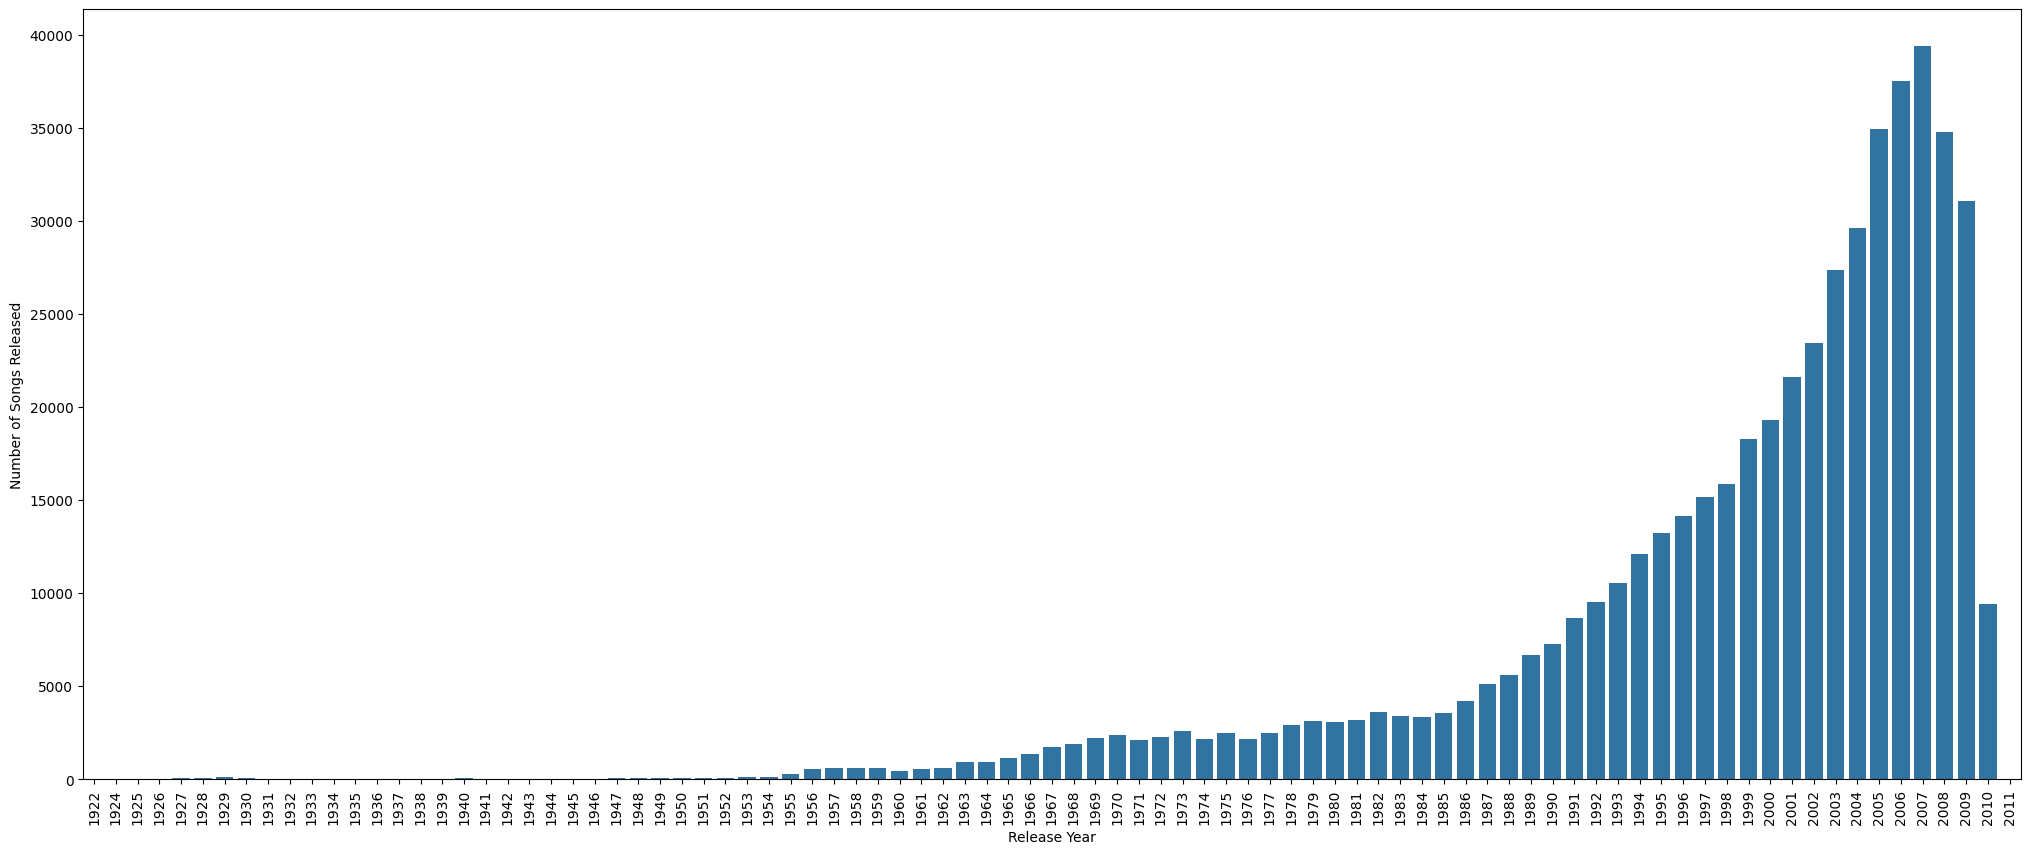

In [32]:
# Creating a barplot plot with y label as "Number of Songs Released" and x label "Release Year"

# Set the figure size
plt.figure(figsize=(25, 10))

# Create a barplot
sns.barplot(x=count.index, y='title', data=count)

# Set the x label of the plot
plt.xlabel("Release Year")
plt.xticks(rotation=90)

# Set the y label of the plot
plt.ylabel('Number of Songs Released')

# Show the plot
plt.show()

#### **Observations and Insights:** #

- From this plot we can see that roughly between **1922 and 1988** no more that **5000 songs** would be released in the whole year.
- Starting form **1953** we can see an ever growing increase in the amount of songs released, only starting to fall in **2008**.
- Close to **~39,000** songs were released in **2007**, the highest amount in the whole dataset.
- From the last 2 years in the data **2010 and 2011** the number of song releases are very small in comparison to the previous 5 years, this can be due to a lack of data collection when analyzing the dataset.

Now that I have explored the data, I will apply different algorithms to build recommendation systems.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [33]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id')['play_count'].count()


In [34]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count': average_count, 'play_freq': play_freq})

# Sorting the final_play dataset in descending order
final_play.sort_values(by=['play_freq', 'avg_count'], ascending=False, inplace=True)

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
8582,1.948069,751
352,2.184492,748
2220,2.220196,713
1118,1.817221,662
4152,1.930982,652


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [35]:
# Defining a function to get the top n products bsed on the highest average count and play frequency
def top_n_songs(data, n, min_interaction):

    # Finding the songs with minimum number of playcounts
    recommendations = data[data['play_freq'] > min_interaction]

    # Sorting values with respect to the average play count of the songs
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)

    return recommendations.index[:n]

I will create a recommendation for the top 10 songs played with the above function.

In [36]:
# Recommend top 10 songs with a play count of at least 50
list(top_n_songs(final_play, 10, 50))

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

In [37]:
# Recommend top 10 songs with a play count of at least 100
list(top_n_songs(final_play, 10, 100))

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

After creating the recommendation of songs with a play count of **50 and 100**, we can see that **9 out of 10** songs appear in both lists, with song **8324** being the only different one of the first list with the **50 play count** and song **352** as the outlier in the second list with **100 play count**.

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models I will use the "surprise" library.

In [38]:
# Installing the surprise package using pip.
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505190 sha256=050022861ed88d934c8cf83092ecffedcb805fdf014b452379b03c280ac2d9b7
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [39]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing play_counts, data should be in structure - user ; item ; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Before building the recommendation systems, I will introduce some basic terminologies I am going to use:

**Relevant song:** A song that is actually **played higher than the threshold play count** is relevant, if the **actual play count is below the threshold then it is a non-relevant item**.

**Recommended song:** A song that's **predicted play count is higher than the threshold is a recommended item**, if the **predicted play count is below the threshold then that song will not be recommended to the user**.

**False Negative (FN):** It is the **frequency of relevant songs that are not recommended to the user**. If the relevant songs are not recommended to the user, then the user might listen to the song. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended songs that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant songs to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant songs that are recommended to the user**, i.e., if out of 10 relevant songs, 7 are recommended to the user then recall is 0.70. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended songs that are relevant actually**, i.e., if out of 10 recommended song, 7 are found relevant by the user then precision is 0.70. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.

Below is the function to calculate **precision@k** and **recall@k**, **RMSE**, and **F1_Score@k** to evaluate the model performance.

 - **Precision@k** - Is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.
 - **Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions.**
 - **F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

In this study the best metric that I will use to compared and determine the best model will be the F1_Score as I am looking to find the recommended songs that are relevant and relevant songs that are recommended and the F1_score is the best representation of both.

In [40]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)

    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) #Command to print the overall precision

    print('Recall: ', recall) #Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

From the function above I have seleted a threshold of 1.5, the reason for that is based on the amount of times a song is played in general, we can see that from the code below.

In [41]:
# Displaying the value count of the play_count column
df_final['play_count'].value_counts()

,count
play_count,
1,72473
2,23890
3,10774
4,5874
5,4865


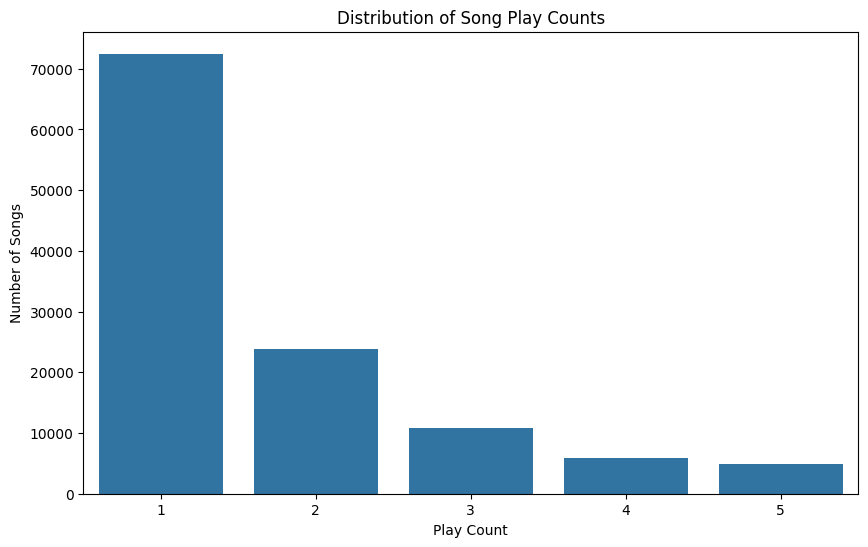

In [42]:
# Creating a bar plot to visualize the play count column
plt.figure(figsize=(10, 6))
sns.countplot(x='play_count', data=df_final)
plt.title('Distribution of Song Play Counts')
plt.xlabel('Play Count')
plt.ylabel('Number of Songs')
plt.show()

As displayed in the above graph I can state that:

- Majority of the songs are played only once with around **~72,500** songs.
- With this major discrepancy on how many times a song is played, if a user listens to a song at least twice, it can be considered a recommendation as, intuitevely a user will not look to listen to a song again if they have nor enjoyed it. With that in mind the threshold has been set as **1.5**.
- If I were to **increase the threshold**, this would reduce the amount ofsongs to be recommmended, this would cause **recall to decrease** and **precision to increase**.
- On the other hand if I were to **decrease the threshold**, this would increase the amount of songs to be recommmended, this would cause **recall to increase** and **precision to decrease**.

Below I am loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this I will be **using the classes `Reader` and `Dataset`**.

I will also notice here that I will read the dataset by providing a scale of ratings. However, I do not have ratings data of the songs. In this case, I am going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song.

In [43]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

Using a testing sample size of 40% will lead to:
- A **more robust model**, and due to the large amount of data, this can provide better generalization insights.
- We will have **high bias** due to having a limited amount of training data.

In [44]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm used to find desired similar items
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**

- I have calculated **RMSE** to check how far the overall predicted ratings are from the actual ratings.
- Intuition of Recall: I am getting a **recall of ~0.69**, which means **out of all the relevant products 69% are recommended**.
- Intuition of Precision: I am getting a **precision of ~0.40**, which means **out of all the recommended products 40% are relevant**.
- Here **F_1 score** of **the baseline model is ~0.50**. It indicates that **about half of all recommended songs were relevant and relevant songs were recommended**. I will try to improve this later by using **GridSearchCV by tuning different hyperparameters** of this algorithm.

Now I will start checking the created model, first I will find a user, and how that user has interacted with an specific song already as a baseline value.

In [45]:
# Fisplaying the first 10 songs on the dataset
df_final.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
206,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
209,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
213,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
216,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


From the first 10 items there are 2 songs that have a count value greater than 1, I will use the interaction between user **6958** and song **1671**. The user 6958 listened to the song 1671, twice according to the data and after the proxy that we used this represents a "rating" of **2**.

In [46]:
# Predicting play_count for a user 6958 with a listened song 1671
sim_user_user.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

- The above output shows that the **predicted rating is close to the actual rating for this user-item pair** by this **user-user-similarity-based baseline model**.
- The **song would be recommended** as it beats the **threshold to 1.5, with its estimated value 1.8**.
- The **output** also contains **"actual_k"**. It is the value of K in KNN that is used while training the model.

Now I will need to find a list of user that have not interacted with song 1671, test more on the model.

First I will create a function to find a **list of users who have not listened to song "1671"**.

In [47]:
# Creating a function to find users that have not interacted with specific song
def n_users_not_interacted_with(n, data, song_id):
    users_interacted_with_song = set(data[data['song_id'] == song_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_interacted_with_song))[:n]

In [48]:
# Finding a list of unique users who have not interacted with song "1671"
n_users_not_interacted_with(5, df_final, 1671)

[8194, 49157, 32773, 8199, 40969]

- It can be observed from the above list that users **"8194", "49157", "32773", "8199", "40969" has not listened to song "1671"** as those userId's are part of the above list.

I will now predict the rating for all 5 users above who have not interacted with **song_id=1671**.

In [49]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(8194, 1671, verbose=True)

user: 8194       item: 1671       r_ui = None   est = 1.45   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.451611401882498, details={'actual_k': 40, 'was_impossible': False})

In [50]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(49157, 1671, verbose=True)

user: 49157      item: 1671       r_ui = None   est = 1.00   {'actual_k': 4, 'was_impossible': False}


Prediction(uid=49157, iid=1671, r_ui=None, est=1.0, details={'actual_k': 4, 'was_impossible': False})

In [51]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(32773, 1671, verbose=True)

user: 32773      item: 1671       r_ui = None   est = 1.30   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=32773, iid=1671, r_ui=None, est=1.3, details={'actual_k': 40, 'was_impossible': False})

In [52]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(8199, 1671, verbose=True)

user: 8199       item: 1671       r_ui = None   est = 1.48   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8199, iid=1671, r_ui=None, est=1.475, details={'actual_k': 40, 'was_impossible': False})

In [53]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(40969, 1671, verbose=True)

user: 40969      item: 1671       r_ui = None   est = 1.45   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=40969, iid=1671, r_ui=None, est=1.45, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

- Out of all the predictions created for song "1671", **all 5 users would not be recommended the song**.
- 3 out of the 5 users, have their estimated values **very close to the threshold of 1.5**.


Now, I'll try to tune the model and see if I can improve the model performance.

To improve the performance I can use a set of hyperparameters for the KNNBasic Algorithm:
- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise:
  * cosine
  * msd (default)
  * Pearson
  * Pearson baseline

In [54]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40, 50],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine', 'pearson'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0565449546897128
{'k': 50, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


Once the grid search is complete, I can get the **optimal values for each of those hyperparameters**.

Now, I'll build the **final model by using the tuned values of the hyperparameters**, which I received by **using grid search cross-validation**.

In [55]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 50, min_k = 9, random_state = 1)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k=10
precision_recall_at_k(sim_user_user_optimized)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0596
Precision:  0.414
Recall:  0.623
F_1 score:  0.497


**Observations and Insights:**

I can observe that after tuning hyperparameters:
- **F_1 score** of the model has slightly went down compared to the baseline model but it is still close to **~0.50**.
- **RMSE** of the model has gone down slightly as well in comparison to the model with default hyperparameters.

From the values calculated, **I cannot state if the model has improved or not**.

In [56]:
# Predicting the play count for a user 6958 who has listened to the song 1671 and rated 2.
sim_user_user_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.53   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5325739475720954, details={'actual_k': 50, 'was_impossible': False})

Using the optimized model the song is still recommended to the user with an estimate rating of **1.53**, the value is much lower than the baseline model that had a value of **1.80**.

From the results of this test, **the optimized model is worse than the baseline model** from our test.

I will now predict the an interaction between user 6958 and a song that he has not interacted with yet. First I will create a function to get a list of songs that an user has not listened to.

In [57]:
# Creating a function to find songs that have not been listened by an user
def get_unheard_songs(n, data, user_id):
    user_songs = set(data[data['user_id'] == user_id]['song_id'])
    all_song = set(data['song_id'])
    return list(all_song.difference(user_songs))[:n]

In [58]:
# Finding songs that user 6958 has not listened to
get_unheard_songs(5, df_final, 6958)

[2048, 6148, 21, 22, 6175]

Predicting all 5 songs for user **6958**

In [59]:
# Predict the play count for a song that is not listened to by user 6958
sim_user_user_optimized.predict(6958, 2048, verbose=True)

user: 6958       item: 2048       r_ui = None   est = 1.50   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.4970414201183435, details={'actual_k': 50, 'was_impossible': False})

In [60]:
# Predict the play count for a song that is not listened to by user 6958
sim_user_user_optimized.predict(6958, 6148, verbose=True)

user: 6958       item: 6148       r_ui = None   est = 1.36   {'actual_k': 28, 'was_impossible': False}


Prediction(uid=6958, iid=6148, r_ui=None, est=1.3590765103615252, details={'actual_k': 28, 'was_impossible': False})

In [61]:
# Predict the play count for a song that is not listened to by user 6958
sim_user_user_optimized.predict(6958, 21, verbose=True)

user: 6958       item: 21         r_ui = None   est = 1.77   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=21, r_ui=None, est=1.77133864099241, details={'actual_k': 50, 'was_impossible': False})

In [62]:
# Predict the play count for a song that is not listened to by user 6958
sim_user_user_optimized.predict(6958, 22, verbose=True)

user: 6958       item: 22         r_ui = None   est = 1.43   {'actual_k': 47, 'was_impossible': False}


Prediction(uid=6958, iid=22, r_ui=None, est=1.4260451287966547, details={'actual_k': 47, 'was_impossible': False})

In [63]:
# Predict the play count for a song that is not listened to by user 6958
sim_user_user_optimized.predict(6958, 6175, verbose=True)

user: 6958       item: 6175       r_ui = None   est = 1.86   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=6175, r_ui=None, est=1.86, details={'actual_k': 50, 'was_impossible': False})

**Observations and Insights:**

- **2 of the 5 songs, would 100% be recommended to user 6958**, as they both had an estimated value greater than the **threshold of 1.5**.
- **3 of the 5 songs, would 100% not be recommended to user 6958**, as they had an estimated value lower than the **threshold of 1.5**.
- **Song 2048** had an estimated value of **1.497**, which gets rounded up **1.5**, however as the **estimated value needs to be greater than 1.5 the song would still not be recommended**.
- The model is still **able to provide relevant recommendations to its users**.

I can also find out similar songs to a given song or its nearest neighbors based on this KNNBasic algorithm. Below, I am finding the 5 most similar songs to the first song in the list with internal id 0, based on the msd distance metric.

In [64]:
# I can find the neighbors using the get_neighbors() function in which, 0 is the inner id of the above user
sim_user_user_optimized.get_neighbors(0, 5)

[31, 82, 90, 116, 125]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [65]:
# Creating get recommendations function
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the users for those non played song ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted play_counts
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # Returing top n highest predicted play_count songs for this user

In [66]:
# Make top 5 recommendations for user 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [67]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,2.935235
1,6450,2.668720
2,8324,2.467205
3,6448,2.386082
4,4831,2.348859


**Observations and Insights:**

While comparing the ratings of two songs, it is not only the ratings that describe the likelihood of the user to listen to that song. Along with the rating, the number of users who have listened the song also becomes important to consider.

Due to this, I will calculate the "corrected_ratings" for each movie. Commonly higher the "play_count" of a song more it is liked by users. To interpret the above concept, a song rated 4 with play_count 3 is less liked in comparison to a song rated 3 with a play_count of 50.

It has been empirically found that the likelihood of a song is directly proportional to the inverse of the square root of the play_count of the song.

### Correcting the play_counts and Ranking the above songs

In [68]:
def ranking_songs(recommendations, playing_count):

    # Sort the songs based on play counts
    ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

    # Merge with the recommended songs to get predicted play_counts
    ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count']), on='song_id', how='inner')

    # Rank the songs based on corrected play_counts
    ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

    # Sort the songs based on corrected play_counts
    ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

    return ranked_songs

In the above-corrected rating formula, the quantity 1 / np.sqrt(n) is subtracted, which we are doing it to have more realistic predictions, also to combat any form of overestimation for any small n.

It is also possible to add this quantity to get more optimistic predictions. This may be used if the main going to to have users explore new songs.

In [69]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
1,7224,107,2.935235,2.838562
2,6450,102,2.668720,2.569705
4,8324,96,2.467205,2.365143
0,6448,109,2.386082,2.290300
3,4831,97,2.348859,2.247324


**Observations and Insights:**

After using the ranking songs function, based on their play_freq, all of them had their play_counts reduced a couple points varying between **0.10 and 0.09**.

### Item Item Similarity-based collaborative filtering recommendation systems

Above I developed a **similarity-based collaborative filtering** where similarity is calculated **between users**. Now I will look into similarity-based collaborative filtering where similarity is seen **between items**.

In [70]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items. Use random_state=1
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**

- When initially compared to the **user-user recommendation system**, the **item-item recommendation system** performs worse based on recall, precision and F_1 Score.
- I am getting a **recall of ~0.56**, which means **out of all the relevant products 56% are recommended**.
- I am getting a **precision of ~0.30**, which means **out of all the recommended products 30% are relevant**.
- Here **F_1 score** of **the baseline model is ~0.40**. It indicates that **less than half of all recommended songs were relevant and relevant songs were recommended**. I will try to improve this later by using **GridSearchCV by tuning different hyperparameters** of this algorithm.

In [71]:
# Predicting play count for a user 6958 and song 1671 listened to by the user r_ui=2
sim_item_item.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [72]:
# Predict the play count for a user that has not listened to the song 1671
sim_item_item.predict(8194, 1671, verbose=True)

user: 8194       item: 1671       r_ui = None   est = 1.65   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.6455179645415152, details={'actual_k': 40, 'was_impossible': False})

In [73]:
# Predict the play count for a user that has not listened to the song 1671
sim_item_item.predict(49157, 1671, verbose=True)

user: 49157      item: 1671       r_ui = None   est = 1.00   {'actual_k': 2, 'was_impossible': False}


Prediction(uid=49157, iid=1671, r_ui=None, est=1.0, details={'actual_k': 2, 'was_impossible': False})

In [74]:
# Predict the play count for a user that has not listened to the song 1671
sim_item_item.predict(32773, 1671, verbose=True)

user: 32773      item: 1671       r_ui = None   est = 1.42   {'actual_k': 11, 'was_impossible': False}


Prediction(uid=32773, iid=1671, r_ui=None, est=1.424581374349829, details={'actual_k': 11, 'was_impossible': False})

In [75]:
# Predict the play count for a user that has not listened to the song 1671
sim_item_item.predict(8199, 1671, verbose=True)

user: 8199       item: 1671       r_ui = None   est = 1.33   {'actual_k': 28, 'was_impossible': False}


Prediction(uid=8199, iid=1671, r_ui=None, est=1.329613621284604, details={'actual_k': 28, 'was_impossible': False})

In [76]:
# Predict the play count for a user that has not listened to the song 1671
sim_item_item.predict(40969, 1671, verbose=True)

user: 40969      item: 1671       r_ui = None   est = 1.24   {'actual_k': 19, 'was_impossible': False}


Prediction(uid=40969, iid=1671, r_ui=None, est=1.240513244482289, details={'actual_k': 19, 'was_impossible': False})

**Observations and Insights:**

- With the baseline **item-item model**, the song **1671** would **not be recommended** to user **6958**, as it was estimated a value of **1.36**, even though the user already interacted with the song and had a **"rating" of 2**.
- Based on the other 5 users, only user **8194**, would have song **1671** recommended to him with estimated value of **1.65**.
- The remaining 4 users, would not have song **1671** recommended to them as they are all under the **threshold of 1.5**.

I will now optimize the model

In [77]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [False], 'min_support': [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0241639867214314
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


The performance of a music recommendation system depends on key parameters like the number of **neighbors (k), similarity metrics (Cosine, Pearson), and min_support**, which impact accuracy, diversity, and personalization. **Higher k and min_support improve generalization, while lower values lead to more personalized but potentially noisier recommendations.**

There is always a possibility to improve the model further by increasing the amount of parameters to be tested within the Grid Search Cross Validation, however as we increase the parameters, the computational power is also increased, taking longer to find the best model.

In [78]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': False,
               'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations and Insights:**

- **RMSE** was slightly reduced compared to the baseline.
- **Recall improved to ~0.66**, when compared to the baseline, which means **out of all the relevant songs 66% are recommended**.
- **Precision also improved ~ 0.41**, when compared to the baseline,which means **out of all the recommended songs 41% are relevant**.
- Likewise **F_1 score**, improved from the baseline model as its value **is ~0.50**, compared to the previous **~0.40**, now it is suggested that **half of recommended songs were relevant and relevant songs were recommended**.
- I can state that based on these values the **optmized model has improved** from its baseline.

In [79]:
# Predict the play_count by a user 6958 for the song 1671, r_ui=2
sim_item_item_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [80]:
# Predicting play count for a user 6958 with songs not listened to by the user
sim_item_item_optimized.predict(6958, 2048, verbose=True)

user: 6958       item: 2048       r_ui = None   est = 1.08   {'actual_k': 7, 'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.0781817944137069, details={'actual_k': 7, 'was_impossible': False})

In [81]:
# Predicting play count for a user 6958 with songs not listened to by the user
sim_item_item_optimized.predict(6958, 6148, verbose=True)

user: 6958       item: 6148       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=6148, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [82]:
# Predicting play count for a user 6958 with songs not listened to by the user
sim_item_item_optimized.predict(6958, 21, verbose=True)

user: 6958       item: 21         r_ui = None   est = 2.03   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=21, r_ui=None, est=2.026586934669889, details={'actual_k': 10, 'was_impossible': False})

In [83]:
# Predicting play count for a user 6958 with songs not listened to by the user
sim_item_item_optimized.predict(6958, 22, verbose=True)

user: 6958       item: 22         r_ui = None   est = 1.28   {'actual_k': 7, 'was_impossible': False}


Prediction(uid=6958, iid=22, r_ui=None, est=1.2752611032941943, details={'actual_k': 7, 'was_impossible': False})

In [84]:
# Predicting play count for a user 6958 with songs not listened to by the user
sim_item_item_optimized.predict(6958, 6175, verbose=True)

user: 6958       item: 6175       r_ui = None   est = 1.35   {'actual_k': 8, 'was_impossible': False}


Prediction(uid=6958, iid=6175, r_ui=None, est=1.3470681717364967, details={'actual_k': 8, 'was_impossible': False})

**Observations and Insights:**

- With the optimized model the estimated value for user **6958** in relation to song **1671**, is higher than the baseline model with an estimated value of **1.96**, meaning now that the song would be recommended, a great result considering the base line model has not recommended the song, even though the user **"rated" 2**.
- 2 out of the 5 songs had an estimated value of above **1.5** for user **6958**, only the songs **6148 and 21** would be recommended to the user using this model.
- The remaining songs would not be recommended as they had an estimated value below the **threshold of 1.5**

Similarly as the other model I can also find out similar songs to a given song or its nearest neighbors based on this KNNBasic algorithm.

In [85]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, 5)

[124, 523, 173, 205, 65]

Making a list with 5 recommendations for user 6958 with the optimized item-item model.

In [86]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [87]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [88]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


**Observations and Insights:**

After using the ranking songs function, based on their play_freq, all of them had their play_counts reduced a couple points varying between **0.10 and 0.07**.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. The model uses **latent features** to find recommendations for each user.

Singular Value Decomposition (SVD) is used to **8compute the latent features** from the **user-item matrix**. But SVD does not work when there are **miss values** in the **user-item matrix**.

In [89]:
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


**Observations and Insights:**

- This model has the smallest **RMSE** value out of all systems so far.
- It has a **recall of ~0.63**, which means **out of all the relevant products 63% are recommended**.
- A **precision of ~0.41**, which means **out of all the recommended songs 41% are relevant**.
- The **F_1 score** of the **baseline model is ~0.50**. It indicates that **half the recommended products were relevant and relevant products were recommended**, the value matches the first model we created, user-user model. Later I will try to improve this using GridSearchCV.

In [90]:
# Making prediction for user 6958 to song 1671, r_ui = 2
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [91]:
# Predicting play count for a user 6958 with songs not listened to by the user
svd.predict(6958, 2048, verbose=True)

user: 6958       item: 2048       r_ui = None   est = 1.61   {'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.6099559950664186, details={'was_impossible': False})

In [92]:
# Predicting play count for a user 6958 with songs not listened to by the user
svd.predict(6958, 6148, verbose=True)

user: 6958       item: 6148       r_ui = None   est = 1.35   {'was_impossible': False}


Prediction(uid=6958, iid=6148, r_ui=None, est=1.348076494575591, details={'was_impossible': False})

In [93]:
# Predicting play count for a user 6958 with songs not listened to by the user
svd.predict(6958, 21, verbose=True)

user: 6958       item: 21         r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=21, r_ui=None, est=1.438484110669069, details={'was_impossible': False})

In [94]:
# Predicting play count for a user 6958 with songs not listened to by the user
svd.predict(6958, 22, verbose=True)

user: 6958       item: 22         r_ui = None   est = 1.38   {'was_impossible': False}


Prediction(uid=6958, iid=22, r_ui=None, est=1.3806428284581413, details={'was_impossible': False})

In [95]:
# Predicting play count for a user 6958 with songs not listened to by the user
svd.predict(6958, 6175, verbose=True)

user: 6958       item: 6175       r_ui = None   est = 1.33   {'was_impossible': False}


Prediction(uid=6958, iid=6175, r_ui=None, est=1.3318834501019419, details={'was_impossible': False})

**Observations and Insights:**

- With this model the estimated value for user **6958** in relation to song **1671**, has a value of **1.27**, meaning that the song would not be recommended, which is not a great result considering the user gave a **"rating" of 2** for that song.
- Song **2048** was the only song with an estimated value of above **1.5** for user **6958**, with a value of **1.61**.
- The remaining 4 songs had an estimated value of below **1.5** for user **6958**, none of those songs would be recommended to the user using this model.
- The **user-user optimized model** made more recommendations than this model, with a total of 2.

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [96]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0124132502893126
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


The performance of a music recommendation system depends on key parameters like the number of **epochs, learning rate, and regularization term**, which impact accuracy, diversity, and personalization. **Higher learning rate converges faster but may overshoot, while lower values converge slower but are more stable during training**. **Higher regularization prevents overfitting but may underfit if too high, while lower can lead to overfitting but might capture complex patterns**.

There is always a possibility to improve the model further by increasing the amount of parameters to be tested within the Grid Search Cross Validation, however as we increase the parameters, the computational power is also increased, taking longer to find the best model.

In [97]:
# Building the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_algo_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_algo_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_algo_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**

- After tuning the hyperparameters, the **model has barely improved**, with changes varying at **max 0.05**.
- **RMSE** was slightly reduced compared to the baseline.
- **Recall remained the same at ~0.63**, when compared to the baseline, which means **out of all the relevant songs 63% are recommended**.
- **Precision is also unchanged at ~ 0.41**, when compared to the baseline,which means **out of all the recommended songs 41% are relevant**.
- Likewise **F_1 score**, did not change from the baseline model as its value **continued to be ~0.50**.
- It is still suggested that **half of recommended songs were relevant and relevant songs were recommended**.

In [98]:
# Using svd_algo_optimized model to recommend for user 6958 and song 1671, r_ui=2
svd_algo_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [99]:
# Predicting play count for a user 6958 with songs not listened to by the user
svd_algo_optimized.predict(6958, 2048, verbose=True)

user: 6958       item: 2048       r_ui = None   est = 1.41   {'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.4131233841668376, details={'was_impossible': False})

In [100]:
# Predicting play count for a user 6958 with songs not listened to by the user
svd_algo_optimized.predict(6958, 6148, verbose=True)

user: 6958       item: 6148       r_ui = None   est = 1.31   {'was_impossible': False}


Prediction(uid=6958, iid=6148, r_ui=None, est=1.313395804204378, details={'was_impossible': False})

In [101]:
# Predicting play count for a user 6958 with songs not listened to by the user
svd_algo_optimized.predict(6958, 21, verbose=True)

user: 6958       item: 21         r_ui = None   est = 1.50   {'was_impossible': False}


Prediction(uid=6958, iid=21, r_ui=None, est=1.4951422021042067, details={'was_impossible': False})

In [102]:
# Predicting play count for a user 6958 with songs not listened to by the user
svd_algo_optimized.predict(6958, 22, verbose=True)

user: 6958       item: 22         r_ui = None   est = 1.39   {'was_impossible': False}


Prediction(uid=6958, iid=22, r_ui=None, est=1.394235343401433, details={'was_impossible': False})

In [103]:
# Predicting play count for a user 6958 with songs not listened to by the user
svd_algo_optimized.predict(6958, 6175, verbose=True)

user: 6958       item: 6175       r_ui = None   est = 1.59   {'was_impossible': False}


Prediction(uid=6958, iid=6175, r_ui=None, est=1.5898875154467926, details={'was_impossible': False})

**Observations and Insights:**

- The optimized model the estimated value for user **6958** in relation to song **1671**, has a value of **1.34** which is bigger than the baseline estimated value of **1.27**, meaning that the song would again not be recommended, which is not a great result considering the user gave a **"rating" of 2** for that song.
- After optmization song **6175** is now the only song with an estimated value of above **1.5** for user **6958**, with a value of **1.59**.
- The other 4 songs had again an estimated value of below **1.5** for user **6958**, none of those songs would be recommended to the user using this model.
- Once again **user-user optimized model** made more recommendations than this model, with a total of 2.

In [104]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, svd_algo_optimized)

In [105]:
# Ranking songs based on above recommendations
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,2.601899
1,5653,2.108728
2,8324,2.014091
3,6450,1.952493
4,9942,1.940115


In [106]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:**

After using the ranking songs function, based on their play_freq, all of them had their play_counts reduced a couple points varying between **0.10 and 0.09**.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [107]:
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:**

- This model has the smallest **RMSE** value out of all systems so far.
- It has a **recall of ~0.58**, which means **out of all the relevant products 63% are recommended**.
- A **precision of ~0.40**, which means **out of all the recommended songs 41% are relevant**.
- The **F_1 score** of the **baseline model is ~0.47**. It indicates that **less than half of the recommended products were relevant and relevant products were recommended**, the value matches the first model we created, user-user model. Later I will try to improve this using GridSearchCV.

In [108]:
# Making prediction for user 6958 and song 1671, r_ui=2
clust_baseline.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [109]:
# Predicting play count for a user 6958 with songs not listened to by the user
clust_baseline.predict(6958, 2048, verbose=True)

user: 6958       item: 2048       r_ui = None   est = 1.47   {'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.4664938245182446, details={'was_impossible': False})

In [110]:
# Predicting play count for a user 6958 with songs not listened to by the user
clust_baseline.predict(6958, 6148, verbose=True)

user: 6958       item: 6148       r_ui = None   est = 0.93   {'was_impossible': False}


Prediction(uid=6958, iid=6148, r_ui=None, est=0.9270001604685996, details={'was_impossible': False})

In [111]:
# Predicting play count for a user 6958 with songs not listened to by the user
clust_baseline.predict(6958, 21, verbose=True)

user: 6958       item: 21         r_ui = None   est = 1.53   {'was_impossible': False}


Prediction(uid=6958, iid=21, r_ui=None, est=1.5256850009888328, details={'was_impossible': False})

In [112]:
# Predicting play count for a user 6958 with songs not listened to by the user
clust_baseline.predict(6958, 22, verbose=True)

user: 6958       item: 22         r_ui = None   est = 1.33   {'was_impossible': False}


Prediction(uid=6958, iid=22, r_ui=None, est=1.325317353930009, details={'was_impossible': False})

In [113]:
# Predicting play count for a user 6958 with songs not listened to by the user
clust_baseline.predict(6958, 6175, verbose=True)

user: 6958       item: 6175       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid=6958, iid=6175, r_ui=None, est=1.700168945942961, details={'was_impossible': False})

**Observations and Insights:**

- With this model the estimated value for user **6958** in relation to song **1671**, has a value of **1.29**, meaning that the song would not be recommended, again this result is not a great, considering the user gave a **"rating" of 2** for that song.
- Songs **21 and 6175** were the only songs with an estimated value of above **1.5** for user **6958**, with values of **1.53 and 1.70** respectively.
- The remaining 3 songs had an estimated value of below **1.5** for user **6958**, none of those songs would be recommended to the user using this model.
- This model has provided the same number of song recommendations as the **user-user model**.

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [114]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-Fold gridsearch cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Printing the best RMSE score
print(gs.best_score['rmse'])

# Printing the combination of parameters that gives the best RMSE score
print(gs.best_params['rmse'])

1.0609494934521857
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


The performance of a music recommendation system is influenced by **content-based filtering parameters** like **feature weighting** (e.g., TF-IDF, Word2Vec). Increasing the number of latent factors in matrix factorization methods like Clustering improves the accuracy of user preference representation.

There is always a possibility to improve the model further by increasing the amount of parameters to be tested within the Grid Search Cross Validation, however as we increase the parameters, the computational power is also increased, taking longer to find the best model.

In [115]:
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 6, n_epochs = 10, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0691
Precision:  0.398
Recall:  0.56
F_1 score:  0.465


**Observations and Insights:**

- After tuning the hyperparameters, the **model has not improved**, with changes varying at **max 0.07**.
- **RMSE** has slightly increased compared to the baseline.
- **Recall was reduced ~0.56**, when compared to the baseline, which means **out of all the relevant songs 56% are recommended**.
- **Precision remained at ~ 0.40**, when compared to the baseline,which means **out of all the recommended songs 40% are relevant**.
- The **F_1 score**, was reduced from the baseline model as its value **now is ~0.46**.
- From the numbers alone it may seem that the **model may not have improved**.

In [116]:
# Using co_clustering_optimized model to recommend for user 6958 and song 1671m r_ui=2
clust_tuned.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.52   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=2.517927997461247, details={'was_impossible': False})

In [117]:
# Predicting play count for a user 6958 with songs not listened to by the user
clust_tuned.predict(6958, 2048, verbose=True)

user: 6958       item: 2048       r_ui = None   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.2923374599747404, details={'was_impossible': False})

In [118]:
# Predicting play count for a user 6958 with songs not listened to by the user
clust_tuned.predict(6958, 6148, verbose=True)

user: 6958       item: 6148       r_ui = None   est = 1.11   {'was_impossible': False}


Prediction(uid=6958, iid=6148, r_ui=None, est=1.1055960967627891, details={'was_impossible': False})

In [119]:
# Predicting play count for a user 6958 with songs not listened to by the user
clust_tuned.predict(6958, 21, verbose=True)

user: 6958       item: 21         r_ui = None   est = 1.21   {'was_impossible': False}


Prediction(uid=6958, iid=21, r_ui=None, est=1.2131900914805083, details={'was_impossible': False})

In [120]:
# Predicting play count for a user 6958 with songs not listened to by the user
clust_tuned.predict(6958, 22, verbose=True)

user: 6958       item: 22         r_ui = None   est = 0.99   {'was_impossible': False}


Prediction(uid=6958, iid=22, r_ui=None, est=0.9862882458431206, details={'was_impossible': False})

In [121]:
# Predicting play count for a user 6958 with songs not listened to by the user
clust_tuned.predict(6958, 6175, verbose=True)

user: 6958       item: 6175       r_ui = None   est = 1.53   {'was_impossible': False}


Prediction(uid=6958, iid=6175, r_ui=None, est=1.5260125813994576, details={'was_impossible': False})

**Observations and Insights:**

- The optimized model the estimated value for user **6958** in relation to song **1671**, has a value of **2.52** which is bigger than the baseline estimated value of **1.29**, meaning that the song now would be recommended, which is a great result considering the user gave a **"rating" of 2** for that song.
- After optmization song **6175** is now the only song with an estimated value of above **1.5** for user **6958**, with a value of **1.53**.
- The other 4 songs had again an estimated value of below **1.5** for user **6958**, none of those songs would be recommended to the user using this model.
- Both the **baseline clustering model** and **user-user optimized model** made more recommendations than this model, with a total of 2.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [122]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [123]:
# Ranking songs based on the above recommendations
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,4.318543
1,6450,3.558806
2,8483,3.189847
3,7496,3.148736
4,8019,3.108970


In [124]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
3,7224,107,4.318543,4.221869
4,6450,102,3.558806,3.459791
2,8483,123,3.189847,3.099680
0,7496,301,3.148736,3.091097
1,8019,250,3.108970,3.045724


**Observations and Insights:**

After using the ranking songs function, based on their play_freq, all of them had their play_counts reduced a couple points varying between **0.10 and 0.05**.

### Content Based Recommendation Systems

In a **content-based recommendation system**, I will use the features - **title, release and artist**, i.e., songs, artists and release year to find similar songs.

Text data generally contains pronunciation, stopwords, and non-ASCII characters, which makes it **very noisy**. So, I will first need to **pre-process the text** and then I will **generate features from the text to compute similarities** between the texts/reviews.

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [125]:
# Creating a new dataframe to not modify the final dataset
df_small = df_final

In [126]:
# Concatenating the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'].map(str) + ' ' + df_small['release'].map(str) + ' ' + df_small['artist_name'].map(str)

df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [127]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small.drop_duplicates(subset=['title'], inplace=True)

# Set the title column as the index
df_small.set_index('title', inplace=True)

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [128]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

In [129]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')
nltk.download('punkt_tab')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


I will create a **function to pre-process the text data:**

In [130]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

I will use the **TF-IDF** as the feature extracting technique

In [131]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer=tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
tfidf_song = tfidf.fit_transform(df_small['text']).toarray()

In [132]:
# Displaying the vectorized dataframe
pd.DataFrame(tfidf_song)

,0,1,2,3,4,5,6,7,8,9,...,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
# Computing the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(tfidf_song)

# Displaying the similar_songs array
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, I will create a function to find most similar songs to recommend for a given song.

In [134]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Getitng a list of the top 10 recommending songs similar to the song "Learn to Fly"

In [135]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights:**

- The song **"Learn to Fly"** was composed by the **Foo Fighters**, it is from the album **"There is Nothing Left to Lose"** released in **1999**.
- The songs **Everlong, The Pretender** are also 2 songs that were composed by the Foo Fighters.
- The songs **From Left to Right and Lifespan of a Fly**, do not seem to have a direct correlation, besides the word *Fly* that is present is both song titles.
- The songs **Under the Gun, All The Pretty Faces and Bones** are all songs from **The Killers**, both artists are similar in their genres of the **alternative rock**.
- The songs **Nothing Better, I Need A Dollar, and Feel The Love**, are songs that do not seem to have a direct correlation to **Learn to Fly**.

**Majority of the recommendations given** have a direct of close to direct correlation with the song **Learn to Fly**. This implies that the resulting recommendation system is working well.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:

- In this case study, we built 6 different types of recommendation systems each with a unique algorithm, those being: Rank-based using averages; User-User similarity-based collaborative filtering; Item-Item similarity-based collaborative filtering; Model-based collaborative filtering (matrix factorization); Cluster based; Content Based;
- Based on the performance evaluation used for these models, I can determine which of them is the best by their respective precision@k, recall@k and F_1 score.
- Rank-based using averages
  * The model is very simple to be implemented and executed, however it does not provide any clear unique recommendation based on specific user interests, it just considers a popular song and recommends the same popular songs to more users, leading to the song becoming more popular.
  * The model can be used effectively but not as a stand-alone model.
- User-User similarity-based collaborative filtering
  * It was the only model that provided a worse estimated value, when using the optimized model in comparison to its baseline model (baseline estimate = 1.8, optimized estimate = 1.53).
  * Both baseline and optimized models would still recommend user 6958 the song 1671. Good result as the user "rating" for song 1671 is 2.
- Item-Item similarity-based collaborative filtering
  * The optimized model is one of the most accurates that I created with an estimated value of 1.96 when compared to the "rated" 2.
  * The baseline model did not recommend song 1671 to user 6958.
  * This optimized model is a very strong candidate to be the adopted model.
- Model-based collaborative filtering (matrix factorization)
  * Was the only model that neither baseline and optimized versions, lead to a recommendation of song 1671 to user 6958.
  * This is the worst model that I available out of the 6.
- Cluster based
  * The optimized model provided the highest estimated value of all models with 2.52, when compared to the "rated" 2.
  * The baseline model did not recommend song 1671 to user 6958.
  * This optimized model is a good, however it still not as precise and the item-item similarity-based optimized model.
- Content based
  * From the 10 recommendations created 7 of them had some type of relevance, either by being from the same artists, similar genres, or similar wording.
  * This model provided a much greater insight on how to better utilize the full potential of the dataset.
  * This is also a very strong candidate to be the adopted model.

- All the models can be improved through hyperparameter tuning. With the huge range of hyperparameters available for each model, there is always a possibility to find the most optimal hyperparameters, the only problem with this is how time intensive this will be until the Grid Search Cross-Validation analyzes all the parameters added.

**2. Refined insights**:

After analyzing this dataset, it became clear that frequency of plays per song is a one of the most relevant parameters that I had to work with as it directly correlates to the users interaction with a song.

From that parameter alone I was able to create all the models stated above and also create new interactions between the parameters when using the title, release and artist, to create a new text column to be analyzed on the content based recommendation system.

Knowing how to balance between popularity and personalization is a very important insight, as every user is unique, some favor popular tracks, while others prefer lesser-known songs.

User-Item interaction patterns are another very meaningful insight as we could see from both cluster and content based models that, grouping users with similar music tastes influences all other's recommendations; Likewise grouping users with common preferences improves the personalization aspect mentioned above.

Cold start problem and new user behavior, are two more important insights to consider as for a new user, popularity is a very strong factor to start building the new user's profile. A new song on the other hand, has almost no interaction data, with the use of content based filtering this new song can be group with similar known tracks and start being recommended to interested users.

**3. Proposal for the final solution design:**

After creating and optimizing all 6 models during this project, and getting a better understanding of the insights of the dataset and the goal at hand, there is not one single model that stands out as the best of them all, as each of them have their unique advantages.

Having said that the model that I would propose as the best would be a hybrid model in which the Item-Item similarity-based collaborative filtering, Cluster Based, Content Based and Ranking Based would all be used, as each model has strengths that would provide better personalization, reduce the cold start problem, and provide the balance between exploration and exploitation.

The Item-Item similarity-based collaborative filtering model was the most precise when providing an estimate based on our tests and observations made in this project, this model allows the user to find similar songs based on their past interactions, this can reinforce the interactions between the user and the song.

Cluster Based model groups songs based on similar features, this is the method in which the model would do its exploitation, to keep the user within its personalized experience, providing recommendations within similar genres and/or artists.

Content Based model is the only model that uses more of the features of the dataset looking at the title, release and artist, and it provides similar songs based on a song that the user may have just listened or is very popular to the user, this is how the model would expand the user experience through exploration, giving recommendations of other songs from the same artist, songs where the artist is featured, other songs from similar artists, etc.

The Ranking Based model provides the most popular songs, this can be used to better reduce the cold start problem, by providing new users the most popular songs initially and from that start developing a more personalized experience with the Content Based model.

The main drawback of creating this hybrid model is the computational power that would be required to get it done, and with it the computational time to get the model created and optimized.

At this moment if I were to simply use one of the created models for my recommendation system, the Item-Item similarity-based collaborative filtering model would be my first choice solely based on the precision that I have observed from the tests done; and the runner up would be the Content Based model, due to its recommendations using the text features of the dataset, allowing a greater variety of recommendations to the users.